In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.interpolate
import os

In [4]:
# folder = './Eph-5.0ev_Chi-3.5eV/'
folder = '../reference'

In [7]:
pe = pd.read_csv(os.path.join(folder, 'photoexcited_particles.csv'),
                 sep=' ', names=['id', 'x', 'y', 'Ei'], header=0)
pe['x'] *= 1e9
pe['y'] *= 1e9

em = pd.read_csv(os.path.join(folder, 'emitted.csv'),
                 sep=' ', names=['id', 'time', 'Ef'], header=0)
em['time'] *= 1e12

df = em.merge(pe, on='id')

In [8]:
len(pe[pe.x < 64.37]) / len(pe)

0.8310398146332119

In [9]:
particles = pd.read_csv(os.path.join(folder, 'particles.csv'),
                        sep=' ', names=['timestep', 'time', 'n'], header=0)
particles['time'] *= 1e12

In [10]:
potential = pd.read_csv(os.path.join(folder, 'potential000.xyz'),
                        sep=' ', names=['x', 'y', 'V'], header=0)
band = potential[potential.y==0.1][['x']].copy()
band['V'] = potential[potential.y==0.1].V * -1
band['V'] += np.abs(band.iloc[0].V)
band['x'] *= 1e3
band_around = scipy.interpolate.interp1d(band.x, band.V, bounds_error=False, fill_value=0.)

In [11]:
print('Y = {:.2f}%'.format(len(em) / len(pe) * 100.))
print('Ymax = {:.2f}%'.format((1.0 - len(pe[pe.x < df.x.min()]) / len(pe)) * 100.))
print('x = {:.2f} nm'.format(df.x.min()))

Y = 5.09%
Ymax = 72.49%
x = 11.72 nm


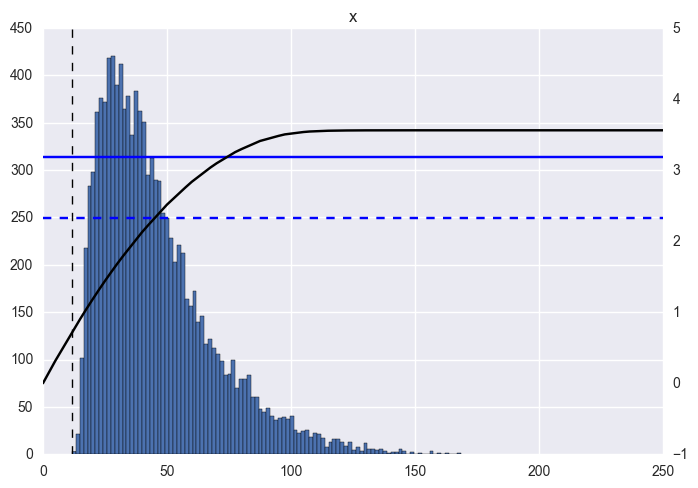

In [12]:
fig, ax  = plt.subplots()
ax2 = ax.twinx()
df.hist('x', bins=100, ax=ax)
ax.axvline(df.x.min(), c='k', ls='--', lw=1)
ax2.axhline(band.iloc[0].V + 3.18)
ax2.axhline(band_around(df.x.min()) + (5 - 3.393), ls='--')
band.plot('x', 'V', ax=ax2, c='k', grid=False, legend=False, ylim=(-1, 5), xlim=(0, 250))

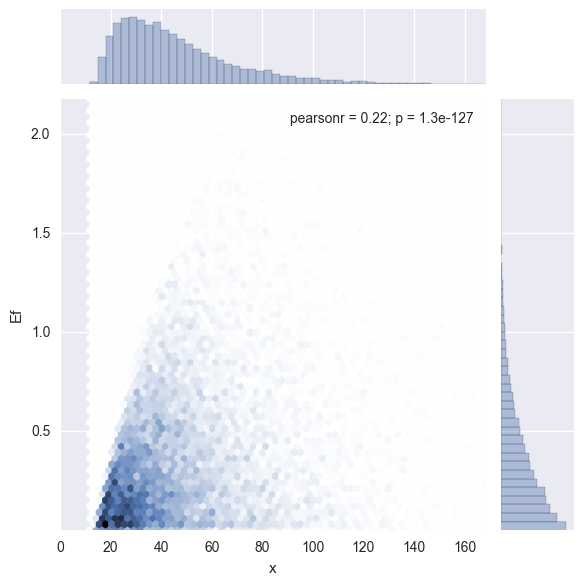

In [13]:
sns.jointplot('x', 'Ef', data=df, kind='hex', xlim=(0, df.x.max()))

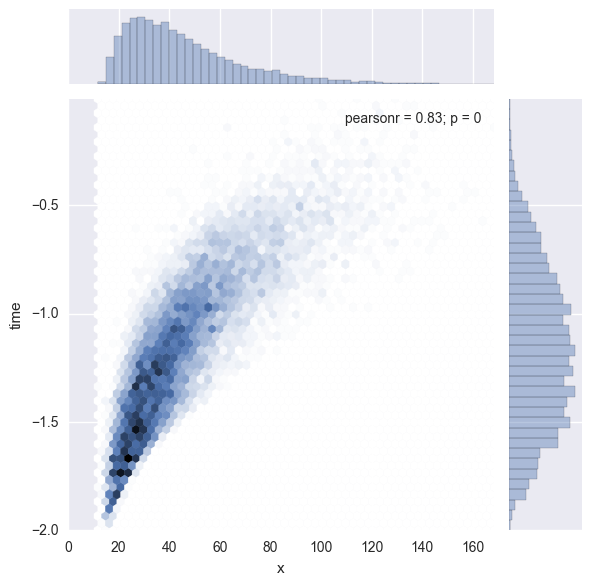

In [14]:
sns.jointplot(df.x, np.log10(df.time), kind='hex', xlim=(0, df.x.max()))

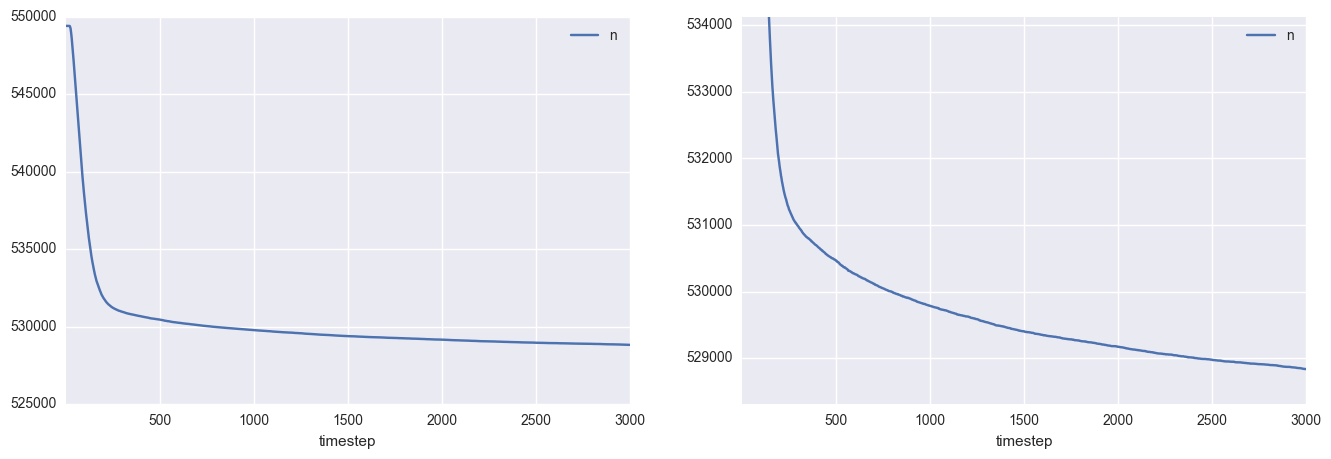

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
particles.plot(x='timestep', y='n', ax=ax[0])
particles.plot(x='timestep', y='n', ax=ax[1], ylim=(particles.n.min() * 0.999, particles.n.min() * 1.01))

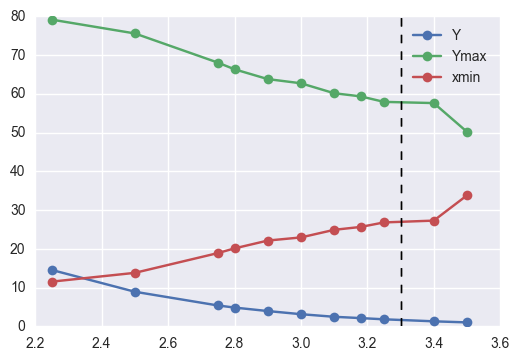

In [99]:
chi = np.array([2.25, 2.5, 2.75, 2.8, 2.9, 3.0, 3.1, 3.18, 3.25, 3.4, 3.5,])
Ymax = np.array([79.13, 75.57, 68.04, 66.32, 63.79, 62.71, 60.14, 59.33, 57.91, 57.60, 50.18,])
xmin = np.array([11.52, 13.79, 18.89, 20.10, 22.12, 22.93, 24.89, 25.64, 26.80, 27.27, 33.79,])
Y = np.array([14.53, 8.91, 5.37, 4.83, 3.93, 3.12, 2.45, 2.11, 1.80, 1.28, 1.09, 1.00,])
plt.plot(chi, Y, label='Y', marker='o')
plt.plot(chi, Ymax, label='Ymax', marker='o')
plt.plot(chi, xmin, label='xmin', marker='o')
plt.axvline(x=3.3, ls='--', c='k', lw=1)
plt.axvline(x=3.3, ls='--', c='k', lw=1)
plt.legend()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     403.0
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           3.96e-08
Time:                        16:44:57   Log-Likelihood:                -12.616
No. Observations:                  10   AIC:                             29.23
Df Residuals:                       8   BIC:                             29.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -28.6869      2.545    -11.270      0.0

/home/jmarini/.virtualenvs/scipy/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


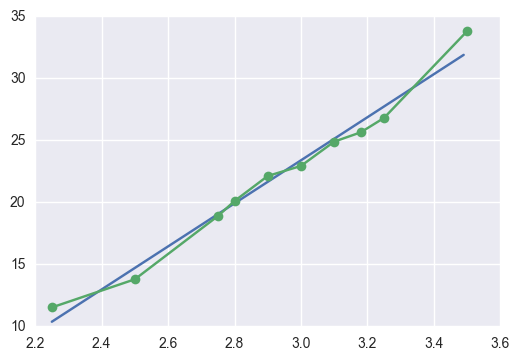

In [91]:
y = xmin.reshape(-1, 1)
X = sm.add_constant(chi.reshape(-1, 1))
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

xx = np.arange(2.25, 3.5, 0.01)
yy = np.dot(sm.add_constant(xx), results.params)
plt.plot(xx, yy)
plt.plot(chi, xmin, marker='o')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     684.6
Date:                Mon, 06 Feb 2017   Prob (F-statistic):           4.89e-09
Time:                        16:44:58   Log-Likelihood:                -12.756
No. Observations:                  10   AIC:                             29.51
Df Residuals:                       8   BIC:                             30.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        131.3742      2.581     50.896      0.0

/home/jmarini/.virtualenvs/scipy/lib/python3.5/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


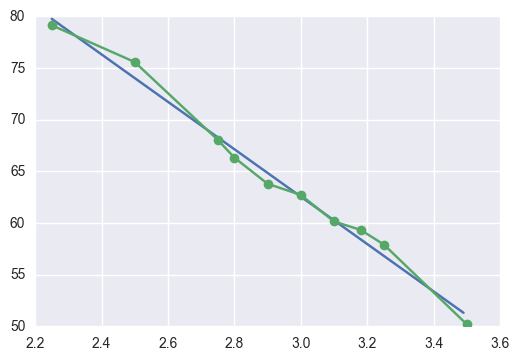

In [92]:
y = Ymax.reshape(-1, 1)
X = sm.add_constant(chi.reshape(-1, 1))
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

xx = np.arange(2.25, 3.5, 0.01)
yy = np.dot(sm.add_constant(xx), results.params)
plt.plot(xx, yy)
plt.plot(chi, Ymax, marker='o')